In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("numpy_dataset.csv", delimiter=",")
df = df.iloc[:-1]
df

,m2,distance to sea,rent as dollar
0,47.0,13.884933,3000.0
1,59.0,14.932375,3100.0
2,48.0,11.869566,3200.0
3,52.0,12.769862,3300.0
4,51.0,11.846936,3400.0
...,...,...,...
94,128.0,1.281015,12400.0
95,145.0,1.358466,12500.0
96,129.0,0.603192,12600.0
97,140.0,0.520742,12700.0


In [ ]:
X = df.drop(["rent as dollar"], axis = 1)
X.columns = X.columns.astype(str)
categorical =["m2","distance to sea","rent as dollar"]
y = df[["rent as dollar"]]
x = pd.get_dummies(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)
x_test = x_test[x_train.columns]

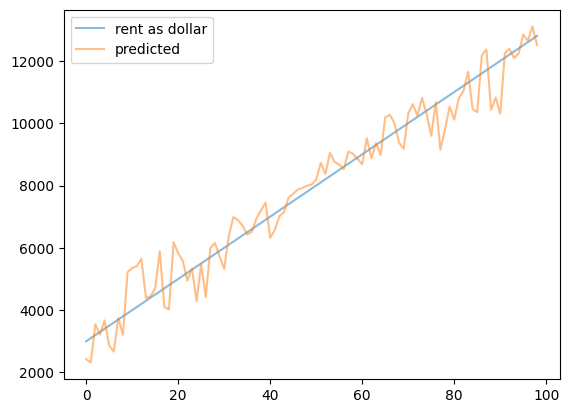

In [ ]:
linear = LinearRegression()
model = linear.fit(x, y)
df['predicted'] = linear.predict(x)

df[['rent as dollar', 'predicted']].plot(alpha=0.5);

In [ ]:
predicted_linear = model.predict(x_train)
np.sqrt(mean_squared_error(y_train,predicted_linear))

629.4950323456353

In [ ]:
r2_score(y_train,predicted_linear)

0.951026681230073

In [ ]:
scores = cross_val_score(model, y_train, predicted_linear, cv = 5)

In [ ]:
print(scores)

[0.92279589 0.89216713 0.9588828  0.94947724 0.95818773]


In [ ]:
m2 = float(input("please enter the house's squarefoot:"))
distance = float(input("please enter the house' distance from sea as km: "))

please enter the house's squarefoot:150
please enter the house' distance from sea as km: 1


In [ ]:
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [ ]:
new_data = [m2, distance]
x.loc[len(x)] = new_data
y_pred = model.predict(x.iloc[-1:])

In [ ]:
print(x)

       m2  distance to sea
0    47.0        13.884933
1    59.0        14.932375
2    48.0        11.869566
3    52.0        12.769862
4    51.0        11.846936
..    ...              ...
95  145.0         1.358466
96  129.0         0.603192
97  140.0         0.520742
98  120.0         0.226795
99   50.0         8.000000

[100 rows x 2 columns]


In [ ]:
print("your rent should be: ", y_pred)

your rent should be:  [[13223.98174291]]
